### Notebook for Camryn and Cassidy

In [2]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

#from salishsea_tools import viz_tools

## Looking at Horizontal Slices of SalishSeaCast for Sep 29, 2022

First lets open the file that has the physical tracers in (salinity called vosaline and temperature called votemper)

In [3]:
phys = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/29sep22/SalishSea_1h_20220929_20220929_grid_T.nc')
phys

FileNotFoundError: [Errno 2] No such file or directory: b'/results2/SalishSea/nowcast-green.201905/29sep22/SalishSea_1h_20220929_20220929_grid_T.nc'

And look at the specific variables.  Note the full names and the units

In [5]:
phys.vosaline

<xarray.DataArray 'vosaline' (time_counter: 24, deptht: 40, y: 898, x: 398)>
[343107840 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] 2022-09-29T00:30:00 ... 2022...
  * time_counter   (time_counter) datetime64[ns] 2022-09-29T00:30:00 ... 2022...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_reference_salinity
    long_name:           salinity
    units:               g kg-1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

In [6]:
phys.votemper

<xarray.DataArray 'votemper' (time_counter: 24, deptht: 40, y: 898, x: 398)>
[343107840 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] 2022-09-29T00:30:00 ... 2022...
  * time_counter   (time_counter) datetime64[ns] 2022-09-29T00:30:00 ... 2022...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_conservative_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

A naive plot, note that we have chosen the second time step (1 == 01:30 UTC) and the near surface (0 == 0.5 m depth)

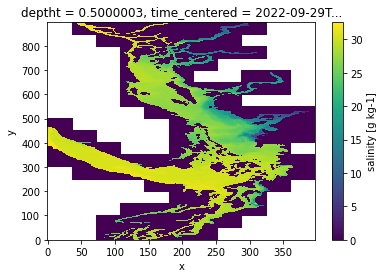

In [8]:
phys.vosaline[1, 0].plot();

Okay but we could do better.
* shape is distorted
* where the land is, we have 0 values, except where we are not computing which are NaN's.

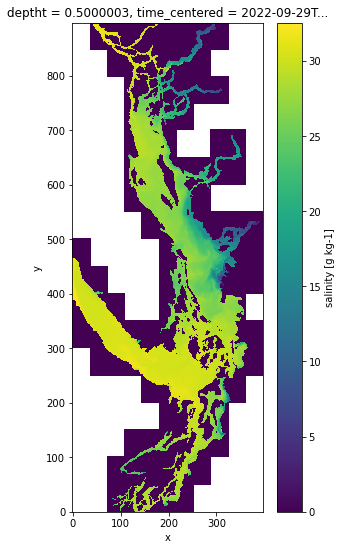

In [14]:
# set up a proper set of axes and chose a better size
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
phys.vosaline[1, 0].plot(ax=ax);
# fix the aspect ratio
viz_tools.set_aspect(ax);

In [15]:
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

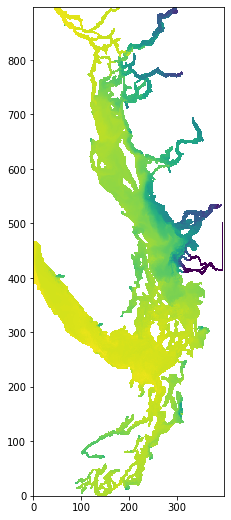

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
ax.pcolormesh(salinity)
viz_tools.set_aspect(ax);

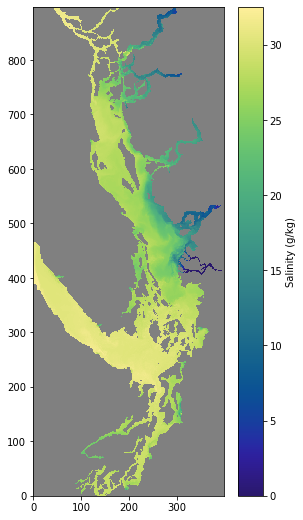

In [23]:
# note that switching to pcolormesh from xarray we lost our colorbar and our title
# Here I will also improve the colormap
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
viz_tools.set_aspect(ax);

In [38]:
# Zoom in on Rosario Strait and the Nooksack River

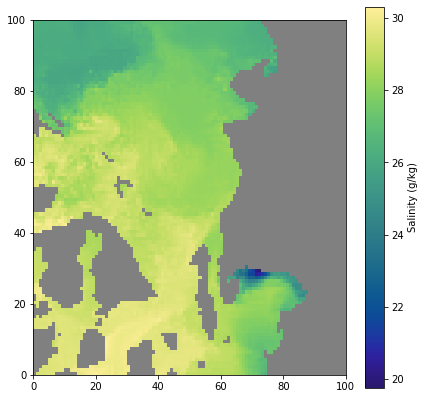

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colours = ax.pcolormesh(salinity[280:380, 280:380], cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')
viz_tools.set_aspect(ax);

In [39]:
# Now do a vertical cross-section through Rosario Strait and into Bellingham Bay

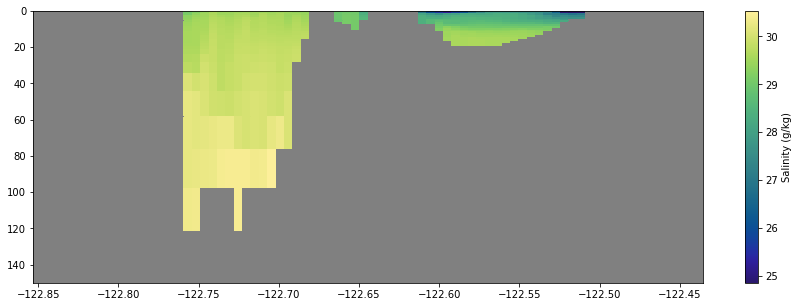

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
salinity = np.ma.masked_array(phys.vosaline[1, :, 305, 300:380], mask=tmask[:, 305, 300:380])
colours = ax.pcolormesh(phys.nav_lon[305, 300:380+1], phys.deptht, salinity[:39], cmap=cmap)
ax.set_ylim(0, 150)
ax.invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)');

In [41]:
# Velocity across the cross-section

In [43]:
vvel = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/29sep22/SalishSea_1h_20220929_20220929_grid_V.nc')
vmask = 1 - mesh.vmask[0]

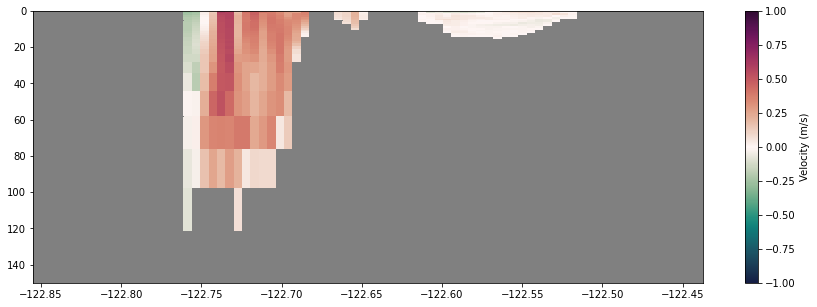

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
cmap = cm.curl
cmap.set_bad('grey')
northvel = np.ma.masked_array(vvel.vomecrty[1, :, 305, 300:380], mask=vmask[:, 305, 300:380])
colours = ax.pcolormesh(vvel.nav_lon[305, 300:380+1], vvel.depthv, northvel[:39], cmap=cmap, vmax=1.0, vmin=-1.0)
ax.set_ylim(0, 150)
ax.invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)');

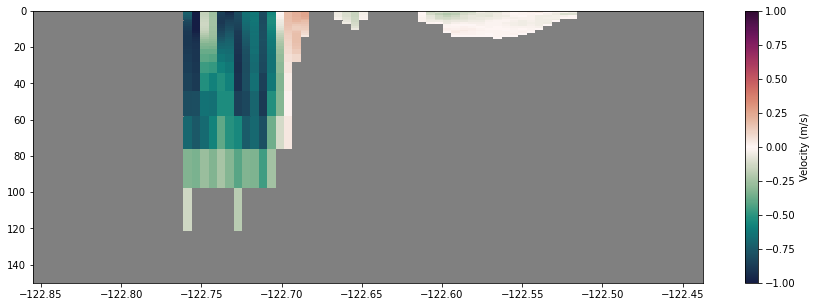

In [47]:
# and six hours later
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
northvel = np.ma.masked_array(vvel.vomecrty[7, :, 305, 300:380], mask=vmask[:, 305, 300:380])
colours = ax.pcolormesh(vvel.nav_lon[305, 300:380+1], vvel.depthv, northvel[:39], cmap=cmap, vmax=1.0, vmin=-1.0)
ax.set_ylim(0, 150)
ax.invert_yaxis();
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Velocity (m/s)');

### And Looking at the Rivers ###

In [50]:
# file for 2017 Sep 29 (Sorry, its in my space not on /results)
river = xr.open_dataset('/home/sallen/MEOPAR/tools/I_ForcingFiles/Rivers/ncfiles/R202108Dailies_y2017m09d29.nc')

In [51]:
# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

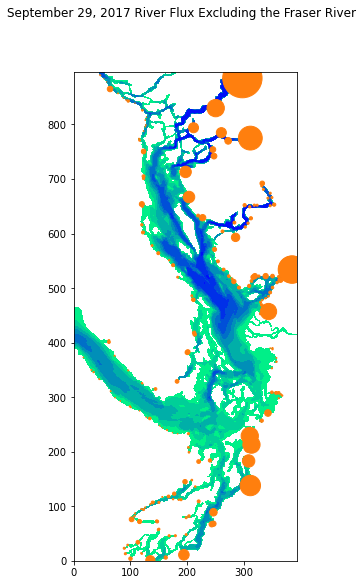

In [55]:
# exclude Fraser off the edge
jmax = 394
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(river.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(4, 9))
ax.contourf(bathy.Bathymetry[:, :jmax], cmap='winter_r')
      
ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='tab:orange')
                      
fig.suptitle(f'September 29, 2017 River Flux Excluding the Fraser River');